## Running pyscf to populate the MolecularData class

The module run_pyscf.py provides a user-friendly way of running psi4 calculations in FermiLib. The basic idea is that once one generates a MolecularData instance, one can then call pyscf with a specification of certain options (for instance, how much memory to use and what calculations to do) in order to compute things about the molecule, update the MolecularData object, and save results of the calculation. The most common calculations users will want in FermiLib would probably be self-consistent field (aka Hartree-Fock calculations). Our code uses these "SCF" calculations compute orbitals, integrals, Hartree-Fock energy, and more. Other common calculations are CISD and FCI calculations which also compute the 1-RDM and 2-RDM associated with their answers, CCSD calculations which also compute the CCSD amplitudes (useful for UCC) and MP2 calculations which can also be used to UCCSD initial guesses. 
Note that the "delete_input" and "delete_output" options indicate whether to save automatically generated psi4 input files or not. To use this plugin, you will need to personally download pyscf.

Warnings: electronic structure calculations are finicky. They sometimes fail for surprising reasons. See the pyscf documentation for more information or consult and electronic structure theory expert.

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 0.275 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.465763692022 Hartree.
MP2 energy of -0.471483763171 Hartree.
FCI energy of -0.473370003213 Hartree.
Nuclear repulsion energy between protons is 1.92428076698 Hartree.
Spatial orbital 0 has energy of -0.817340000936 Hartree.
Spatial orbital 1 has energy of 1.42093584882 Hartree.

At bond length of 0.35 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.780454902072 Hartree.
MP2 energy of -0.786933019271 Hartree.
FCI energy of -0.789269392404 Hartree.
Nuclear repulsion energy between protons is 1.51193488834 Hartree.
Spatial orbital 0 has energy of -0.773812219107 Hartree.
Spatial orbital 1 has energy of 1.26613647236 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 0.425 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.9500662942 Hartree.
MP2 energy of -0.957467753563 Hartree.
FCI energy of -0.960393757432 Hartree.
Nuclear repulsion energy between protons is 1.24512284922 Hartree.
Spatial orbital 0 has energy of -0.731224742484 Hartree.
Spatial orbital 1 has energy of 1.1202060156 Hartree.

At bond length of 0.5 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.04299627454 Hartree.
MP2 energy of -1.05148606962 Hartree.
FCI energy of -1.05515979447 Hartree.
Nuclear repulsion energy between protons is 1.05835442184 Hartree.
Spatial orbital 0 has energy of -0.690822328662 Hartree.
Spatial orbital 1 has energy of 0.988673673002 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 0.575 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.09157049678 Hartree.
MP2 energy of -1.10131707528 Hartree.
FCI energy of -1.10591805325 Hartree.
Nuclear repulsion energy between protons is 0.920308192904 Hartree.
Spatial orbital 0 has energy of -0.652936838321 Hartree.
Spatial orbital 1 has energy of 0.873105751443 Hartree.

At bond length of 0.65 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.11299654567 Hartree.
MP2 energy of -1.12417429634 Hartree.
FCI energy of -1.12990478432 Hartree.
Nuclear repulsion energy between protons is 0.814118786031 Hartree.
Spatial orbital 0 has energy of -0.617605463235 Hartree.
Spatial orbital 1 has energy of 0.773022995439 Hartree.


Warn: Ipython shell catchs sys.args



At bond length of 0.725 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.11734326912 Hartree.
MP2 energy of -1.13013540113 Hartree.
FCI energy of -1.13722137707 Hartree.
Nuclear repulsion energy between protons is 0.729899601269 Hartree.
Spatial orbital 0 has energy of -0.584812015544 Hartree.
Spatial orbital 1 has energy of 0.686877089471 Hartree.


Warn: Ipython shell catchs sys.args



At bond length of 0.8 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.11085039748 Hartree.
MP2 energy of -1.12545353399 Hartree.
FCI energy of -1.13414766668 Hartree.
Nuclear repulsion energy between protons is 0.66147151365 Hartree.
Spatial orbital 0 has energy of -0.554495881131 Hartree.
Spatial orbital 1 has energy of 0.612618086735 Hartree.

At bond length of 0.875 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.0974543197 Hartree.
MP2 energy of -1.11408436316 Hartree.
FCI energy of -1.12467175357 Hartree.
Nuclear repulsion energy between protons is 0.604773955337 Hartree.
Spatial orbital 0 has energy of -0.526513679939 Hartree.
Spatial orbital 1 has energy of 0.54813298342 Hartree.


Warn: Ipython shell catchs sys.args
Traceback (most recent call last):
  File "/home/jmcclean/local/anaconda2/lib/python2.7/multiprocessing/queues.py", line 268, in _feed
    send(obj)
IOError: [Errno 32] Broken pipe
Warn: Ipython shell catchs sys.args



At bond length of 0.95 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.07963692821 Hartree.
MP2 energy of -1.09853448444 Hartree.
FCI energy of -1.11133941774 Hartree.
Nuclear repulsion energy between protons is 0.557028643074 Hartree.
Spatial orbital 0 has energy of -0.500643053408 Hartree.
Spatial orbital 1 has energy of 0.491560510155 Hartree.


Warn: Ipython shell catchs sys.args



At bond length of 1.025 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.05898071013 Hartree.
MP2 energy of -1.08041447981 Hartree.
FCI energy of -1.09580487601 Hartree.
Nuclear repulsion energy between protons is 0.516270449678 Hartree.
Spatial orbital 0 has energy of -0.476626271643 Hartree.
Spatial orbital 1 has energy of 0.441437629683 Hartree.

At bond length of 1.1 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.03653887503 Hartree.
MP2 energy of -1.0608064532 Hartree.
FCI energy of -1.07919294497 Hartree.
Nuclear repulsion energy between protons is 0.481070191745 Hartree.
Spatial orbital 0 has energy of -0.454218694119 Hartree.
Spatial orbital 1 has energy of 0.396695911145 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.175 Bohr, molecular hydrogen has:
Hartree-Fock energy of -1.01306099773 Hartree.
MP2 energy of -1.04048753024 Hartree.
FCI energy of -1.06231541668 Hartree.
Nuclear repulsion energy between protons is 0.450363583762 Hartree.
Spatial orbital 0 has energy of -0.433218017521 Hartree.
Spatial orbital 1 has energy of 0.356574452957 Hartree.

At bond length of 1.25 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.989113814091 Hartree.
MP2 energy of -1.02004941564 Hartree.
FCI energy of -1.04578314455 Hartree.
Nuclear repulsion energy between protons is 0.423341768736 Hartree.
Spatial orbital 0 has energy of -0.413471036649 Hartree.
Spatial orbital 1 has energy of 0.320515554372 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.325 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.965138979586 Hartree.
MP2 energy of -0.999955738808 Hartree.
FCI energy of -1.03005661113 Hartree.
Nuclear repulsion energy between protons is 0.399379027109 Hartree.
Spatial orbital 0 has energy of -0.394866384636 Hartree.
Spatial orbital 1 has energy of 0.288081397752 Hartree.

At bond length of 1.4 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.941480654708 Hartree.
MP2 energy of -0.980569709566 Hartree.
FCI energy of -1.01546824929 Hartree.
Nuclear repulsion energy between protons is 0.377983722086 Hartree.
Spatial orbital 0 has energy of -0.377322825369 Hartree.
Spatial orbital 1 has energy of 0.258901974587 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.475 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.918402055716 Hartree.
MP2 energy of -0.962170870967 Hartree.
FCI energy of -1.0022359731 Hartree.
Nuclear repulsion energy between protons is 0.358764210793 Hartree.
Spatial orbital 0 has energy of -0.360778808505 Hartree.
Spatial orbital 1 has energy of 0.232648634323 Hartree.

At bond length of 1.55 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.896098958325 Hartree.
MP2 energy of -0.944968709166 Hartree.
FCI energy of -0.990476340937 Hartree.
Nuclear repulsion energy between protons is 0.341404652206 Hartree.
Spatial orbital 0 has energy of -0.345185065649 Hartree.
Spatial orbital 1 has energy of 0.209023237141 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args
Traceback (most recent call last):
  File "/home/jmcclean/local/anaconda2/lib/python2.7/multiprocessing/queues.py", line 268, in _feed
    send(obj)
IOError: [Errno 32] Broken pipe
Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.625 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.874712020072 Hartree.
MP2 energy of -0.929114904673 Hartree.
FCI energy of -0.980219639774 Hartree.
Nuclear repulsion energy between protons is 0.325647514412 Hartree.
Spatial orbital 0 has energy of -0.330499875199 Hartree.
Spatial orbital 1 has energy of 0.187754608434 Hartree.

At bond length of 1.7 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.854337626951 Hartree.
MP2 energy of -0.914713958611 Hartree.
FCI energy of -0.971426688458 Hartree.
Nuclear repulsion energy between protons is 0.311280712306 Hartree.
Spatial orbital 0 has energy of -0.316686045438 Hartree.
Spatial orbital 1 has energy of 0.168597322543 Hartree.

At bond length of 1.775 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.835036819455 Hartree.
MP2 energy of -0.901831833626 Hartree.
FCI energy of -0.964006402031 Hartree.
Nuclear repulsion energy between protons is 0.298128006152 Hartree.
Spatial orbital 0 has energy 

Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 1.925 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.799763828147 Hartree.
MP2 energy of -0.880734213989 Hartree.
FCI energy of -0.952761485739 Hartree.
Nuclear repulsion energy between protons is 0.274897252426 Hartree.
Spatial orbital 0 has energy of -0.280129531526 Hartree.
Spatial orbital 1 has energy of 0.121698234354 Hartree.


Warn: Ipython shell catchs sys.args



At bond length of 2.0 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.783792654277 Hartree.
MP2 energy of -0.872511876467 Hartree.
FCI energy of -0.948641112176 Hartree.
Nuclear repulsion energy between protons is 0.26458860546 Hartree.
Spatial orbital 0 has energy of -0.269459223656 Hartree.
Spatial orbital 1 has energy of 0.108997369549 Hartree.

At bond length of 2.075 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.76890514493 Hartree.
MP2 energy of -0.865802852139 Hartree.
FCI energy of -0.945325124834 Hartree.
Nuclear repulsion energy between protons is 0.255025161889 Hartree.
Spatial orbital 0 has energy of -0.259488420123 Hartree.
Spatial orbital 1 has energy of 0.0975121876015 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 2.15 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.755066140849 Hartree.
MP2 energy of -0.860559520937 Hartree.
FCI energy of -0.942677785696 Hartree.
Nuclear repulsion energy between protons is 0.246128935312 Hartree.
Spatial orbital 0 has energy of -0.25018114306 Hartree.
Spatial orbital 1 has energy of 0.0871156542694 Hartree.


Warn: Ipython shell catchs sys.args



At bond length of 2.225 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.742231993159 Hartree.
MP2 energy of -0.856722791678 Hartree.
FCI energy of -0.940578294125 Hartree.
Nuclear repulsion energy between protons is 0.237832454346 Hartree.
Spatial orbital 0 has energy of -0.241501099769 Hartree.
Spatial orbital 1 has energy of 0.0776939126166 Hartree.

At bond length of 2.3 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.730353321355 Hartree.
MP2 energy of -0.854225123201 Hartree.
FCI energy of -0.938922385987 Hartree.
Nuclear repulsion energy between protons is 0.230077048226 Hartree.
Spatial orbital 0 has energy of -0.23341221005 Hartree.
Spatial orbital 1 has energy of 0.0691449985036 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 2.375 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.71937741672 Hartree.
MP2 energy of -0.852993149483 Hartree.
FCI energy of -0.937622232412 Hartree.
Nuclear repulsion energy between protons is 0.222811457229 Hartree.
Spatial orbital 0 has energy of -0.225879143757 Hartree.
Spatial orbital 1 has energy of 0.061377742722 Hartree.

At bond length of 2.45 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.709250219239 Hartree.
MP2 energy of -0.852949830064 Hartree.
FCI energy of -0.936605256416 Hartree.
Nuclear repulsion energy between protons is 0.215990698335 Hartree.
Spatial orbital 0 has energy of -0.218867775452 Hartree.
Spatial orbital 1 has energy of 0.0543107898459 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 2.525 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.699917829065 Hartree.
MP2 energy of -0.854016106823 Hartree.
FCI energy of -0.935812374184 Hartree.
Nuclear repulsion energy between protons is 0.209575133038 Hartree.
Spatial orbital 0 has energy of -0.212345500745 Hartree.
Spatial orbital 1 has energy of 0.0478716815187 Hartree.

At bond length of 2.6 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.691327561197 Hartree.
MP2 energy of -0.856112114321 Hartree.
FCI energy of -0.935196030847 Hartree.
Nuclear repulsion energy between protons is 0.203529696508 Hartree.
Spatial orbital 0 has energy of -0.2062813977 Hartree.
Spatial orbital 1 has energy of 0.0419959755719 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 2.675 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.683428596297 Hartree.
MP2 energy of -0.859158041179 Hartree.
FCI energy of -0.934718271951 Hartree.
Nuclear repulsion energy between protons is 0.197823256419 Hartree.
Spatial orbital 0 has energy of -0.200646248214 Hartree.
Spatial orbital 1 has energy of 0.0366263937864 Hartree.

At bond length of 2.75 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.676172310463 Hartree.
MP2 energy of -0.863074762874 Hartree.
FCI energy of -0.934348987747 Hartree.
Nuclear repulsion energy between protons is 0.192428076698 Hartree.
Spatial orbital 0 has energy of -0.195412454328 Hartree.
Spatial orbital 1 has energy of 0.0317120058829 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 2.825 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.669512378614 Hartree.
MP2 energy of -0.867784361057 Hartree.
FCI energy of -0.934064392349 Hartree.
Nuclear repulsion energy between protons is 0.187319366697 Hartree.
Spatial orbital 0 has energy of -0.190553892381 Hartree.
Spatial orbital 1 has energy of 0.0272074643943 Hartree.

At bond length of 2.9 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.663404741599 Hartree.
MP2 energy of -0.873210617868 Hartree.
FCI energy of -0.933845750779 Hartree.
Nuclear repulsion energy between protons is 0.182474900317 Hartree.
Spatial orbital 0 has energy of -0.186045745933 Hartree.
Spatial orbital 1 has energy of 0.0230723055488 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 2.975 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.657807511304 Hartree.
MP2 energy of -0.87927953613 Hartree.
FCI energy of -0.933678338578 Hartree.
Nuclear repulsion energy between protons is 0.177874692746 Hartree.
Spatial orbital 0 has energy of -0.18186434986 Hartree.
Spatial orbital 1 has energy of 0.0192703273508 Hartree.

At bond length of 3.05 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.652680866726 Hartree.
MP2 energy of -0.885919898164 Hartree.
FCI energy of -0.933550604948 Hartree.
Nuclear repulsion energy between protons is 0.173500724892 Hartree.
Spatial orbital 0 has energy of -0.177987066597 Hartree.
Spatial orbital 1 has energy of 0.0157690500134 Hartree.


Warn: Ipython shell catchs sys.args
Warn: Ipython shell catchs sys.args



At bond length of 3.125 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.647986972272 Hartree.
MP2 energy of -0.893063845078 Hartree.
FCI energy of -0.933453506176 Hartree.
Nuclear repulsion energy between protons is 0.169336707494 Hartree.
Spatial orbital 0 has energy of -0.174392204073 Hartree.
Spatial orbital 1 has energy of 0.0125392576825 Hartree.

At bond length of 3.2 Bohr, molecular hydrogen has:
Hartree-Fock energy of -0.643689931023 Hartree.
MP2 energy of -0.900647439214 Hartree.
FCI energy of -0.933379977349 Hartree.
Nuclear repulsion energy between protons is 0.165367878413 Hartree.
Spatial orbital 0 has energy of -0.171058975462 Hartree.
Spatial orbital 1 has energy of 0.00955461527119 Hartree.


Warn: Ipython shell catchs sys.args


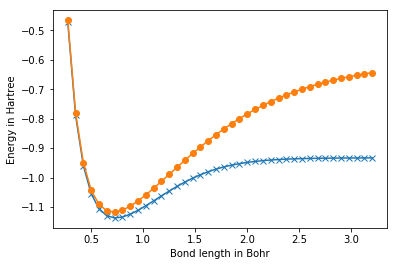

In [5]:
from fermilib.utils import MolecularData
from fermilibpluginpyscf import run_pyscf

# Set molecule parameters.
basis = 'sto-3g'
multiplicity = 1
n_points = 40
bond_length_interval = 3.0 / n_points

# Set calculation parameters.
run_scf = 1
run_mp2 = 1
run_cisd = 0
run_ccsd = 0
run_fci = 1
delete_input = True
delete_output = True

# Generate molecule at different bond lengths.
hf_energies = []
fci_energies = []
bond_lengths = []
for point in range(1, n_points + 1):
    bond_length = bond_length_interval * float(point) + 0.2
    bond_lengths += [bond_length]
    geometry = [('H', (0., 0., 0.)), ('H', (0., 0., bond_length))]
    molecule = MolecularData(
        geometry, basis, multiplicity,
        description=str(round(bond_length, 2)))
    
    # Run Psi4.
    molecule = run_pyscf(molecule,
                         run_scf=run_scf,
                         run_mp2=run_mp2,
                         run_cisd=run_cisd,
                         run_ccsd=run_ccsd,
                         run_fci=run_fci)

    # Print out some results of calculation.
    print('\nAt bond length of {} Bohr, molecular hydrogen has:'.format(
        bond_length))
    print('Hartree-Fock energy of {} Hartree.'.format(molecule.hf_energy))
    print('MP2 energy of {} Hartree.'.format(molecule.mp2_energy))
    print('FCI energy of {} Hartree.'.format(molecule.fci_energy))
    print('Nuclear repulsion energy between protons is {} Hartree.'.format(
        molecule.nuclear_repulsion))
    for orbital in range(molecule.n_orbitals):
        print('Spatial orbital {} has energy of {} Hartree.'.format(
            orbital, molecule.orbital_energies[orbital]))
    hf_energies += [molecule.hf_energy]
    fci_energies += [molecule.fci_energy]

# Plot.
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(0)
plt.plot(bond_lengths, fci_energies, 'x-')
plt.plot(bond_lengths, hf_energies, 'o-')
plt.ylabel('Energy in Hartree')
plt.xlabel('Bond length in Bohr')
plt.show()